# Week 5: K-fold Cross-validation and the Bayes Classifier

## Lecture 13: K-fold Cross-validation

For the `scikit-learn` implementation details, see https://scikit-learn.org/stable/modules/cross_validation.html. We will frequently use the method in the future.

## Lecture 14: The Bayes Classifier

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from scipy.stats import multivariate_normal
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import scipy
from tensorflow.keras.datasets import mnist

In [128]:
class BayesClassifier:
    def fit(self, X, Y):     
        # find the unique labels
        uniqueY = np.unique(Y)
        
        # find the dimensions
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        
        # initialize the outputs
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        self.Sigma = np.zeros([self.k, self.d, self.d])
        
        # compute class prior probabilities, sample means, and sample covariances
        for i, y in enumerate(uniqueY):
            print('Training for class', y)
            # split the X into its classes
            Xi = X[Y == y]
            
            # compute the size of each class
            ni = Xi.shape[0]
            
            # compute the priors
            self.prior[i] = ni / n
            
            # compute the sample mean
            self.mu[i] = np.mean(Xi, axis = 0)
            
            # compute the centered data
            XiBar = Xi - self.mu[i]
            
            # compute the sample covariance
            self.Sigma[i] = (1/ni) * XiBar.T @ XiBar
            
    def predict(self, X):
        n = X.shape[0]
        
        posteriorPre = np.zeros([n, self.k])
        
        # compute the pdf term of the posterior probabilities
        for i in range(n):
            for j in range(self.k):
                posteriorPre[i][j] = scipy.stats.multivariate_normal.pdf(X[i], self.mu[j], self.Sigma[j], allow_singular = True)
                
        # compute a vector proportional to the posterior probabilities
        posterior = posteriorPre * self.prior.T

        # find the label for each datapoint by choosing the most probable class
        predictions = np.argmax(posterior, axis = 1)
        
        return predictions

Training for class 0
Training for class 1
Training for class 2

Predicted class labels:
 [0 0 2 1 0 0 2 1 1 0 1 0 1 1 1 1 0 1 0 2 0 2 2 1 2 0 0 2 2 0 1 0 2 1 0 2 1
 1]

True class labels:
 [0 0 2 1 0 0 2 1 1 0 1 0 1 1 1 1 0 1 0 2 0 2 2 1 1 0 0 2 2 0 1 0 2 1 0 2 2
 1]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.93      0.93        14
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38


Confusion Matrix:



<AxesSubplot:>

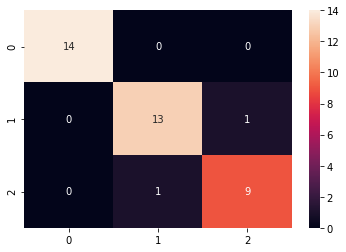

In [132]:
iris = datasets.load_iris()

#print(iris.target_names)

# find the data and labels
X = iris.data
Y = iris.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the Bayes classifier
model = BayesClassifier()

# fit the Bayes classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print predicted and true class labels
print('\nPredicted class labels:\n', predictedY)
print('\nTrue class labels:\n', testY)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Training for class 0
Training for class 1

Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.95      0.98      0.97        86

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143


Confusion Matrix:



<AxesSubplot:>

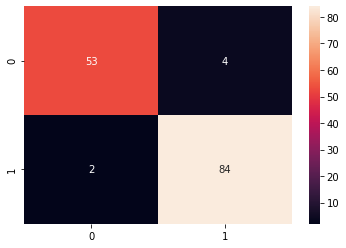

In [133]:
breastcancer = datasets.load_breast_cancer()

#print(iris.target_names)

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the Bayes classifier
model = BayesClassifier()

# fit the Bayes classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Training for class 0
Training for class 1
Training for class 2
Training for class 3
Training for class 4
Training for class 5
Training for class 6
Training for class 7
Training for class 8
Training for class 9

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           9       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.93      0.93      0.90        10
weighted avg       0.95      0.90      0.90        10


Confusion Matrix:



<AxesSubplot:>

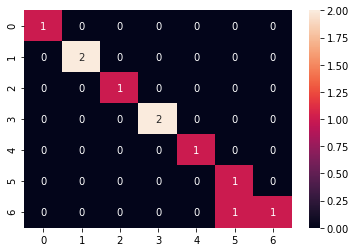

In [160]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2]).astype('float')/255.0
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2]).astype('float')/255.0

testX = testX[:100]
testY = testY[:100]

# build the Bayes classifier
model = BayesClassifier()

# fit the Bayes classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

In [157]:
class NaiveBayesClassifier:
    def fit(self, X, Y):     
        # find the unique labels
        uniqueY = np.unique(Y)
        
        # find the dimensions
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]
        
        # initialize the outputs
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, self.d])
        self.Sigma = np.zeros([self.k, self.d])
        
        # compute class prior probabilities, sample means, and sample covariances
        for i, y in enumerate(uniqueY):
            print('Training for class', y)
            # split the X into its classes
            Xi = X[Y == y]
            
            # compute the size of each class
            ni = Xi.shape[0]
            
            # compute the priors
            self.prior[i] = ni / n
            
            # compute the sample mean
            self.mu[i] = np.mean(Xi, axis = 0)
            self.Sigma[i] = np.var(Xi, axis = 0)
            
    def predict(self, X):
        n = X.shape[0]

        posteriorPre = np.ones([self.k, 1])
        
        # compute the pdf term of the posterior probabilities
        for j in range(self.k):
            posteriorPre[j] = 1
            for i in range(n):
                posteriorPre[j] *= scipy.stats.norm.pdf(X[i], self.mu[j], self.Sigma[j])
                
        # compute a vector proportional to the posterior probabilities
        posterior = posteriorPre * self.prior.T
        
        # find the label for each datapoint by choosing the most probable class
        predictions = np.argmax(posterior, axis = 1)
        
        return predictions

In [158]:
breastcancer = datasets.load_breast_cancer()

#print(iris.target_names)

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the Bayes classifier
model = NaiveBayesClassifier()

# fit the Bayes classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Training for class 0
Training for class 1
[1.613e+01 2.068e+01 1.081e+02 7.988e+02 1.170e-01 2.022e-01 1.722e-01
 1.028e-01 2.164e-01 7.356e-02 5.692e-01 1.073e+00 3.854e+00 5.418e+01
 7.026e-03 2.501e-02 3.188e-02 1.297e-02 1.689e-02 4.142e-03 2.096e+01
 3.148e+01 1.368e+02 1.315e+03 1.789e-01 4.233e-01 4.784e-01 2.073e-01
 3.706e-01 1.142e-01]
[1.73747059e+01 2.15661438e+01 1.14763072e+02 9.69358824e+02
 1.02855621e-01 1.45152288e-01 1.60533007e-01 8.74802614e-02
 1.93512418e-01 6.28535294e-02 6.05702614e-01 1.22615948e+00
 4.31384967e+00 7.28902614e+01 6.71569935e-03 3.22574052e-02
 4.16781046e-02 1.49917843e-02 2.03296013e-02 4.04809150e-03
 2.10754902e+01 2.94205229e+01 1.40953922e+02 1.41707124e+03
 1.44880980e-01 3.82138627e-01 4.56537778e-01 1.83132157e-01
 3.28162092e-01 9.22542484e-02]
[1.03264968e+01 1.33851740e+01 4.80057172e+02 1.36985334e+05
 1.61036005e-04 2.87445094e-03 5.52068521e-03 1.16137957e-03
 7.23100042e-04 6.12110921e-05 1.32947484e-01 2.66150631e-01
 7.5861551

ValueError: setting an array element with a sequence.

In [145]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2]).astype('float')/255.0
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2]).astype('float')/255.0

testX = testX[:10]
testY = testY[:10]

trainNoise = np.random.uniform(-0.1, 0.1, size = trainX.shape)

trainX += trainNoise

# build the Bayes classifier
model = BayesClassifier()

# fit the Bayes classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

print(classification_report(testY, predictedY))

Training for class 0
Training for class 1
Training for class 2
Training for class 3
Training for class 4
Training for class 5
Training for class 6
Training for class 7
Training for class 8
Training for class 9
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.22      0.38      0.26        10
weighted avg       0.17      0.30      0.21        10



G:\Miniconda3\envs\DL\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
